In [43]:
import pandas as pd
import numpy as np
import os
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# 文件路径要求跟代码块在同意路径下，若使用绝对地址则更改origin_path
origin_path = os.getcwd()                # 根目录
source_path = os.path.join(origin_path,"Aavegotchi_Sales.csv")
save_path_ID = os.path.join(origin_path,"ID.xlsx" )
save_path_Buyer = os.path.join(origin_path,"Buyer_count.xlsx" )
save_path_Seller = os.path.join(origin_path,"Seller_count.xlsx" )
save_path_buyer_seller = os.path.join(origin_path,"buyer_seller.xlsx" )

In [3]:
# 若没有表头，使用header=None作为参数
df1 = pd.read_csv(source_path,encoding='ISO-8859-1')

In [4]:
df1

,Unnamed: 0,Listing,Gotchi,Name,Date,Buyer,Seller,Sale Price,BaseRarityScore,ModifiedRarityScore,Kinship,Experience,Wearables,Collateral,StakedAmount,StakedType
0,0,216439,17002,MYTHICALEYE-495BRS/401KIN,2022--04--16 14:43:02,0xf0a960597f499fbf04a182b1ef98ef5d10c0424a,0xd430f0850fc568de4d460b63cfda9b35383dc4df,722.0,495,495,401,80,0,0x1d2a0e5ec8e5bbdca5cb219e649b565d8e5c3360,0.080030,amAAVE
1,1,216447,22152,quadrate,2022--04--16 12:52:38,0x4cb433e0d88e6c98e337f19d32a52dfdb9153b00,0xd430f0850fc568de4d460b63cfda9b35383dc4df,750.0,510,510,348,300,0,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.405847,amDAI
2,2,216419,4784,trabucco,2022--04--16 11:31:19,0x9f23007d231f80be8e8946139f06b9feaaac4944,0xc99df6b7a5130dce61ba98614a2457daa8d92d1c,800.0,502,502,485,335,1,0x20d3922b4a1a8560e1ac99fba4fade0c849e2142,0.017570,maWETH
3,3,216381,23456,Egoist,2022--04--16 11:22:41,0xd6c515bd1cc5111a6f689634bc056a64655b1cc7,0x0914a5b426229bf17584bcc2b6e2ca1993bb2ef4,715.0,455,455,342,110,0,0x1a13f4ca1d028320a707d99520abfefca3998b7f,25.408860,amUSDC
4,4,216410,4326,$DAI 4 U,2022--04--16 10:42:49,0x82131e86d080312e13605aada6538a94df5b41a5,0xc99df6b7a5130dce61ba98614a2457daa8d92d1c,750.0,487,487,466,330,1,0xe0b22e0037b130a9f56bbb537684e6fa18192341,25.100000,maDAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,144587,20063,BRS-520,2021--10--26 15:20:11,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x7f433b38dd933cea19506d1fc26369b326d55cec,528.0,513,529,462,485,3,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.467971,amDAI
4996,4996,144716,24416,Loweye Lucas,2021--10--26 15:19:29,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x03b16ab6e23bdbeeab719d8e4c49d63674876253,469.0,505,513,469,505,3,0x1a13f4ca1d028320a707d99520abfefca3998b7f,25.490490,amUSDC
4997,4997,144954,14769,Don Lito,2021--10--26 14:49:36,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x2a254c18f8e1794b05bea298ae27126df160b9e0,550.0,505,521,483,505,3,0x27f8d03b3a2196956ed754badc28d73be8830a6e,25.505518,amDAI
4998,4998,144996,19390,Steal Me 524 Hi Kin/xp,2021--10--26 14:42:04,0x40cf6bb888ca670e20139b1caa0ba0996f65371c,0x96fe6681b5b8be0c5d6e8eb690adec7ecb0831c9,699.0,525,547,494,475,5,0x60d55f02a771d515e077c9c2403a1ef324885cec,25.971630,amUSDT


In [7]:
df1.columns

Index(['Unnamed: 0', 'Listing', 'Gotchi', 'Name', 'Date', 'Buyer', 'Seller',
       'Sale Price', 'BaseRarityScore', 'ModifiedRarityScore', 'Kinship',
       'Experience', 'Wearables', 'Collateral', 'StakedAmount', 'StakedType'],
      dtype='object')

In [8]:
# 获取姓名字典，若不在姓名字典当中，则扩充字典。max_dict为最后一个姓名的序号，后续序号需要进行+1
Nob_dict = {}
for i in range(len(df1["Buyer"])):
    Nob_dict.update({df1["Buyer"][i]:i+1})
    max_dict = i+1
for i in range(len(df1["Seller"])):
    Nob_dict.update({df1["Seller"][i]:i+1})
    max_dict = i+1

In [19]:
ID_number = {}
j = 1
for i in Nob_dict:
    ID_number.update({i:j})
    j = j+1

In [20]:
ID_number

{'0xf0a960597f499fbf04a182b1ef98ef5d10c0424a': 1,
 '0x4cb433e0d88e6c98e337f19d32a52dfdb9153b00': 2,
 '0x9f23007d231f80be8e8946139f06b9feaaac4944': 3,
 '0xd6c515bd1cc5111a6f689634bc056a64655b1cc7': 4,
 '0x82131e86d080312e13605aada6538a94df5b41a5': 5,
 '0x066bb7c61b4bbe60e08d985a939e51636a6d1f7e': 6,
 '0xa6ab5ca03954e8b2bb54e9006efb8e68824271fa': 7,
 '0xb3749ab08c12ae8bcd95a5f11272927a2ebc36d5': 8,
 '0x7d15a512c288a873594fe0d9e1d77289c28f4e5e': 9,
 '0x9f32b5a3a6a21df1671c74372f18415cb3fcaca2': 10,
 '0x9c77233bbd235a3ed219daa051e0a3de5ce03c3e': 11,
 '0xe1a1d5c32888c5b140917b296e82cf3a448f37a6': 12,
 '0x4557de8c95b3796471c0ca2e18e104f3412e8fea': 13,
 '0x6c127b8ff818d1bbbf6015c327fde5ca73a78a91': 14,
 '0x0ba15d2edb8248d7eb7b65f2bbecdb3732a1cdf5': 15,
 '0xf9246804076fcaabc248c2d3f10d260e4b840e47': 16,
 '0xe71f283e265352c72c250f9a292abb905ebf4b3a': 17,
 '0xe9da1801adcb61a41c6bdfdb7049c5e14383e8fd': 18,
 '0xaf09521189761d72dcfc71010ae82be0ff443d91': 19,
 '0x64df7af696e0977771a0e1e1b1a8dd22ded3

In [21]:
buyer_seller_or = df1[['Buyer','Seller']]

In [22]:
buyer_seller = pd.DataFrame(columns=('Buyer','Seller'))
for i in range(len(buyer_seller_or)):
    buyer_seller = buyer_seller.append([{'Buyer':ID_number[buyer_seller_or['Buyer'][i]],'Seller':ID_number[buyer_seller_or['Seller'][i]]}],ignore_index=True)

In [23]:
buyer_seller

,Buyer,Seller
0,1,31
1,2,31
2,3,1234
3,4,171
4,5,1234
...,...,...
4995,441,133
4996,441,1301
4997,441,89
4998,441,736


In [24]:
buyer_seller['Value'] = 1
buyer_seller = buyer_seller.pivot_table(index='Buyer', columns='Seller', values='Value').fillna(0)
buyer_seller.to_excel(save_path_buyer_seller,index = False)

In [93]:
buyer_seller

Seller,0x00000000005dbcb0d0513fcda746382fe8a53468,0x001041888ca4efd728242ac3b12a9c214495d923,0x002d2715b179d0db3e17cc28317a98f2f65e6884,0x0030b9f1925408d79be83c7cecfffdbacb638e9b,0x00553b963de06016c68681c9bee10a79c51c5d8a,0x00662595f4d9f4cf150ac29d39212be496f8d133,0x006f5c906fad5d25c9a94b92d010114315177950,0x0072394237177430ae1607cfcb8786e198c60a71,0x00987cbce7014389197f9d5468dab5a8facffee0,0x00a8bec03805bcfaafab1050dbcf90f57982d750,...,0xfce64a3197581665aae3215d4ca33266bedebd80,0xfd119bb66648177cfe7840bf44dc05c667a1aca4,0xfd38b16076484da5324241ecebaad3fea25bd284,0xfd4476e38d9afe25c95b45a120c0b07d0dc7c6a9,0xfd9e173edb21bef255d774c7b51314f92e9f31f9,0xfde0690222d27da2677873a801c79241d6ad626c,0xfe32cb2bb7c4f1fcad4f4f6cfc2fec7b50987d12,0xff76a4074c677aa299b8a7d710ec44ebd8ea991d,0xffea5a2cfaf1aafbb87a1fe4eed5413da45c30a0,0xffea8516005b365fe9cb43393c74c3965c98c164
Buyer,,,,,,,,,,,,,,,,,,,,,
0x001041888ca4efd728242ac3b12a9c214495d923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x0030b9f1925408d79be83c7cecfffdbacb638e9b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00504a2263be7a73a7173d82aba03e29817a6b5e,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x00553b963de06016c68681c9bee10a79c51c5d8a,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x0063db089c51ccd06d45c836c0428e0a5712c981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0xfe791b87f607ae6be8449e64d393c91be46a1245,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xff71c7f43917eeb4516c1ac66134b0d331a1ff94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xffc8d9910fb9910b57a9783b841e43f8dd5b4c77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
Buyer_dict = {}
Buyer_count = (Counter(df1["Buyer"])).most_common()
for i in Buyer_count:
    Buyer_dict.update({ID_number[i[0]]:i[1]})

In [26]:
Buyer_dict

{19: 149,
 671: 111,
 207: 97,
 461: 72,
 459: 66,
 506: 61,
 28: 56,
 345: 54,
 450: 53,
 983: 51,
 64: 49,
 304: 39,
 66: 38,
 68: 38,
 988: 38,
 1045: 38,
 133: 37,
 137: 36,
 149: 36,
 284: 36,
 466: 36,
 954: 34,
 955: 34,
 1183: 34,
 634: 33,
 275: 32,
 441: 32,
 313: 30,
 5: 29,
 31: 29,
 975: 29,
 33: 27,
 711: 27,
 672: 25,
 320: 24,
 555: 23,
 622: 23,
 311: 21,
 316: 21,
 44: 20,
 367: 20,
 997: 20,
 239: 19,
 675: 19,
 2: 18,
 7: 18,
 32: 18,
 259: 18,
 360: 18,
 386: 18,
 1108: 18,
 54: 17,
 488: 17,
 806: 17,
 58: 16,
 69: 16,
 232: 16,
 883: 16,
 1148: 16,
 305: 15,
 535: 14,
 830: 14,
 1006: 14,
 1033: 14,
 82: 13,
 121: 13,
 158: 13,
 244: 13,
 467: 13,
 710: 13,
 794: 13,
 39: 12,
 151: 12,
 521: 12,
 707: 12,
 903: 12,
 1058: 12,
 1128: 12,
 3: 11,
 11: 11,
 131: 11,
 252: 11,
 352: 11,
 365: 11,
 434: 11,
 627: 11,
 687: 11,
 701: 11,
 844: 11,
 12: 10,
 91: 10,
 181: 10,
 220: 10,
 257: 10,
 263: 10,
 346: 10,
 493: 10,
 736: 10,
 910: 10,
 1011: 10,
 20: 9,
 45: 9

In [27]:
Seller_dict = {}
Seller_count = (Counter(df1["Seller"])).most_common()
for i in Seller_count:
    Seller_dict.update({ID_number[i[0]]:i[1]})

In [59]:
Seller_dict.values()

dict_values([275, 175, 152, 110, 108, 90, 88, 78, 75, 66, 62, 60, 56, 52, 48, 44, 43, 41, 40, 38, 38, 37, 36, 33, 31, 31, 31, 30, 29, 28, 28, 25, 25, 25, 23, 23, 22, 22, 22, 22, 21, 20, 20, 19, 19, 19, 19, 18, 18, 18, 17, 17, 16, 15, 14, 14, 14, 14, 14, 14, 14, 13, 13, 13, 13, 13, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [39]:
Seller_Buyer_Edges_list = []
for i in range(len(df1['Seller'])):
    Seller_Buyer_Edges_list.append((df1['Buyer'][i],df1['Seller'][i]))

In [40]:
Seller_Buyer_Edges_list

[('0xf0a960597f499fbf04a182b1ef98ef5d10c0424a',
  '0xd430f0850fc568de4d460b63cfda9b35383dc4df'),
 ('0x4cb433e0d88e6c98e337f19d32a52dfdb9153b00',
  '0xd430f0850fc568de4d460b63cfda9b35383dc4df'),
 ('0x9f23007d231f80be8e8946139f06b9feaaac4944',
  '0xc99df6b7a5130dce61ba98614a2457daa8d92d1c'),
 ('0xd6c515bd1cc5111a6f689634bc056a64655b1cc7',
  '0x0914a5b426229bf17584bcc2b6e2ca1993bb2ef4'),
 ('0x82131e86d080312e13605aada6538a94df5b41a5',
  '0xc99df6b7a5130dce61ba98614a2457daa8d92d1c'),
 ('0x066bb7c61b4bbe60e08d985a939e51636a6d1f7e',
  '0xc99df6b7a5130dce61ba98614a2457daa8d92d1c'),
 ('0xa6ab5ca03954e8b2bb54e9006efb8e68824271fa',
  '0xf0a960597f499fbf04a182b1ef98ef5d10c0424a'),
 ('0xb3749ab08c12ae8bcd95a5f11272927a2ebc36d5',
  '0xce0ea75b2df2a889328476a93510a0cccfb7b0ac'),
 ('0x7d15a512c288a873594fe0d9e1d77289c28f4e5e',
  '0x0a9517ecb8e0c4b7ea2ecd2a89aaaa115eec81e9'),
 ('0x7d15a512c288a873594fe0d9e1d77289c28f4e5e',
  '0xbe4a88460ce03492ff55c0eed016dd2536b9fda2'),
 ('0x9f32b5a3a6a21df1671c74372

In [41]:
G = nx.Graph()
# 从列表中加入节点
G.add_nodes_from(list(ID_number.keys()))
#从列表中加入边，注意括号
G.add_edges_from(Seller_Buyer_Edges_list)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


平均度：5.324813631522897


Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

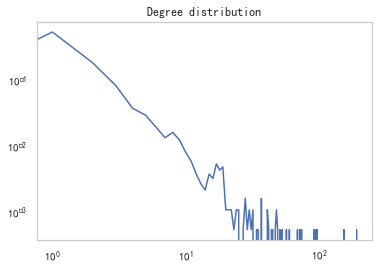

In [51]:
import matplotlib.mlab as mlab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')#不发出警告
#%matplotlib inline
sns.set(context='notebook',font='simhei',style='whitegrid')#设置风格尺度和显示中文
nodeNum = len(ID_number)
edgeNum = 5000
average_degree=edgeNum*2.0/nodeNum
print("平均度："+str(average_degree))
degree_distribute=nx.degree_histogram(G)
x=range(len(degree_distribute))
y=[z/float(sum(degree_distribute))for z in degree_distribute]
plt.grid(False)
plt.title(r'Degree distribution')#在题目中显示mu与sigma
plt.loglog(x,y)
plt.savefig('Degree distribution.png',dpi=1000,bbox_inches = 'tight')#绘图结果存到本地
plt.show()

In [52]:
g_average_clustering_num=nx.average_clustering(G)
print("平均聚集系数："+str(g_average_clustering_num))

平均聚集系数：0.040222002795211


In [57]:
Seller_count

AttributeError: 'list' object has no attribute 'values'

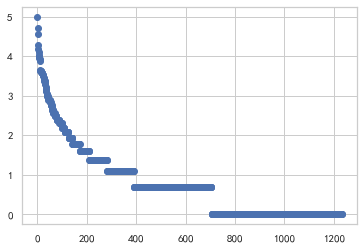

In [73]:
plt.scatter([x for x in range(len(list(Buyer_dict.values())))],np.log(list(Buyer_dict.values()))) #绘制y的曲线 Sale_ki_list
plt.show()

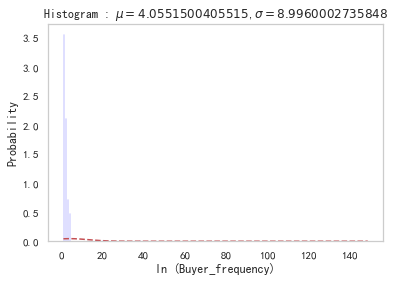

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import matplotlib.mlab as mlab
import seaborn as sns
#%matplotlib inline
sns.set(context='notebook',font='simhei',style='whitegrid')#设置风格尺度和显示中文
 
import warnings
warnings.filterwarnings('ignore')#不发出警告
#直方图
from scipy.stats import norm#使用直方图和最大似然高斯分布拟合绘制分布
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
#rs=np.random.RandomState(50)#设置随机数种子
#s=pd.Series(rs.randn(100)*100)
s=(list(Buyer_dict.values()))

mu =np.mean(s) #计算均值 
sigma =np.std(s) 
num_bins = len(s) #直方图柱子的数量 
n, bins, patches = plt.hist(s, num_bins, density=1, facecolor='blue', alpha=0.55) 
#直方图函数，x为x轴的值，normed=1表示为概率密度，即和为一，绿色方块，色深参数0.5.返回n个概率，直方块左边线的x值，及各个方块对象 
y = norm.pdf(bins, mu, sigma)#拟合一条最佳正态分布曲线y
#str='Histogram : $\mu=5.8433$'+str(mu)+',$\sigma=0.8253$';
plt.grid(False)
plt.plot(bins, y, 'r--') #绘制y的曲线 
plt.xlabel('ln (Buyer_frequency)') #绘制x轴 
plt.ylabel('Probability') #绘制y轴 
plt.title(r'Histogram : $\mu={}$,$\sigma={}$'.format(mu,sigma))#在题目中显示mu与sigma

#plt.subplots_adjust(left=0.15)#左边距 
plt.savefig('Probability fig.png',dpi=1000,bbox_inches = 'tight')#绘图结果存到本地
plt.show()

In [89]:
fit = powerlaw.Fit(list(Seller_dict.values()))

Calculating best minimal value for power law fit


<AxesSubplot:>

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does n

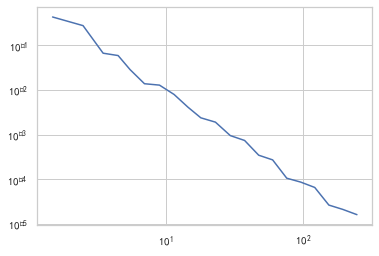

In [90]:
powerlaw.plot_pdf(list(Seller_dict.values()))

In [91]:
fit.power_law.alpha

2.233267983657414

In [78]:
bins, mu, sigma

(array([  1.        ,   1.12003244,   1.24006488, ..., 148.75993512,
        148.87996756, 149.        ]),
 4.0551500405515,
 8.9960002735848)

In [15]:
result_excel_ID = pd.DataFrame()
result_excel_ID['ID'] = ID_number.keys()
result_excel_ID['ID_number'] = ID_number.values()
result_excel_ID.to_excel(save_path_ID,index = False)

In [14]:
result_excel_ID

,ID,ID_number
0,0xf0a960597f499fbf04a182b1ef98ef5d10c0424a,1
1,0x4cb433e0d88e6c98e337f19d32a52dfdb9153b00,2
2,0x9f23007d231f80be8e8946139f06b9feaaac4944,3
3,0xd6c515bd1cc5111a6f689634bc056a64655b1cc7,4
4,0x82131e86d080312e13605aada6538a94df5b41a5,5
...,...,...
1873,0x0e7477b8ffca8a6ef7614b4833bd3e4c7d55c201,1874
1874,0x2a724294b20923f1a6cce2187118e0793a5fff5b,1875
1875,0x1ecde92e6437babe983b272caf9fdc32285c4f68,1876
1876,0xbfe157ef8ae7808a922129216e9b1e3ec01b1897,1877


In [16]:
result_excel_Buyer = pd.DataFrame()
result_excel_Buyer['Buyer'] = Buyer_dict.keys()
result_excel_Buyer['Buyer_Count'] = Buyer_dict.values()
result_excel_Buyer.to_excel(save_path_Buyer,index = False)

In [17]:
result_excel_Seller = pd.DataFrame()
result_excel_Seller['Seller'] = Seller_dict.keys()
result_excel_Seller['Seller_Count'] = Seller_dict.values()
result_excel_Seller.to_excel(save_path_Seller,index = False)